In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [10]:
data=pd.read_csv(r'C:\Users\Krish\Downloads\Mall_Customers.csv')

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
129,130,Male,38,71,75
65,66,Male,18,48,59
68,69,Male,19,48,59
57,58,Male,69,44,46
8,9,Male,64,19,3
149,150,Male,34,78,90
111,112,Female,19,63,54
116,117,Female,63,65,43
104,105,Male,49,62,56


In [16]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(data.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [17]:
# Generate summary statistics of the numerical columns in the DataFrame
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [21]:
# Define features as the columns of your DataFrame (except the target variable)
from sklearn.model_selection import train_test_split
features = data.drop('Age', axis=1)  # Assuming 'prices' is your target variable

# Now you can split your data into training and testing sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

In [23]:
# Selecting the features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [24]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'gender' is the column with categorical data
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.cluster import KMeans

scaled_features = X_train_scaled
scaled_features = np.vstack((X_train_scaled, X_test_scaled))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

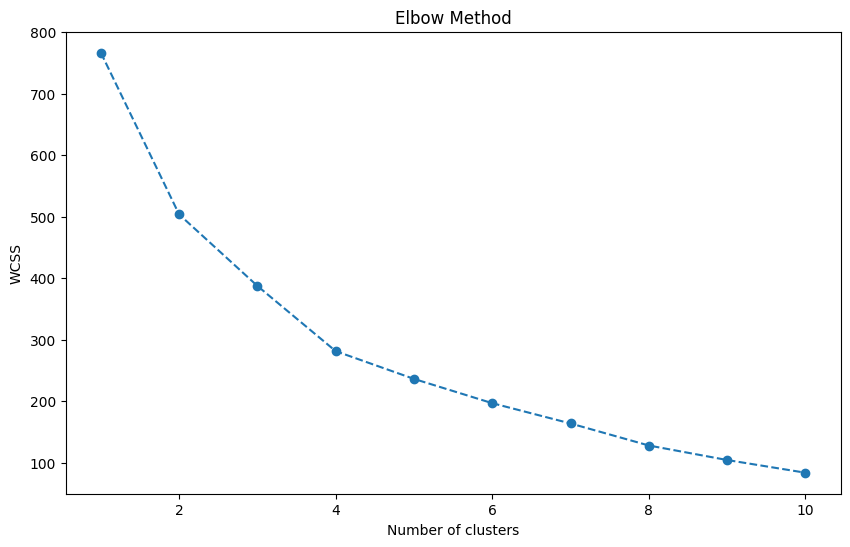

In [29]:
# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [30]:
# Based on the elbow method, choose the optimal number of clusters
optimal_clusters = 5

In [31]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

In [33]:
# Apply K-means clustering to the training data with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
train_cluster_labels = kmeans.fit_predict(X_train_scaled)

In [34]:
# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train_scaled)

# Predict cluster labels for the training data
train_cluster_labels = kmeans.labels_

# Predict cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test_scaled)

In [35]:
# Add cluster labels to the original data
X_train['Cluster'] = train_cluster_labels
X_test['Cluster'] = test_cluster_labels

In [36]:
# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train_scaled)

# Predict cluster labels for the training data
train_cluster_labels = kmeans.labels_

# Predict cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test_scaled)

# Print the count of customers in each cluster
print("Training Data:")
print(pd.Series(train_cluster_labels).value_counts())

print("\nTest Data:")
print(pd.Series(test_cluster_labels).value_counts())

Training Data:
1    48
2    35
0    34
3    26
4    17
Name: count, dtype: int64

Test Data:
3    12
1    11
2    10
0     5
4     2
Name: count, dtype: int64


In [37]:
# Visualize the clusters (assuming 3D plot for Age, Annual Income, and Spending Score)
from mpl_toolkits.mplot3d import Axes3D

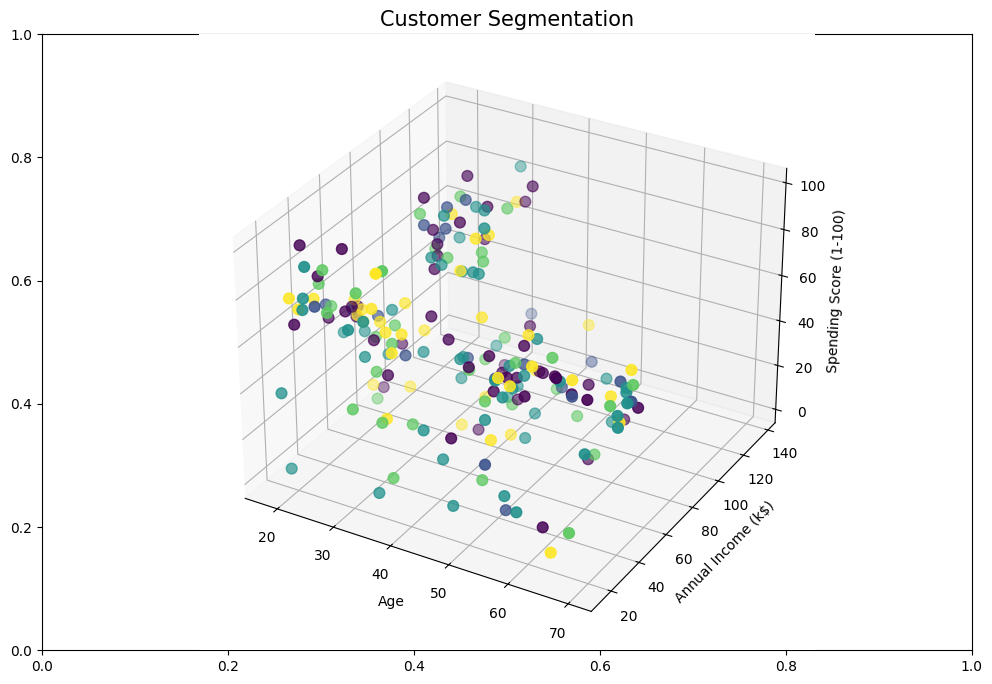

In [38]:
fig = plt.figure(figsize=(12, 8))
plt.title("Customer Segmentation", fontsize = 15)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['Age'], features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

c:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


200
(200, 5)


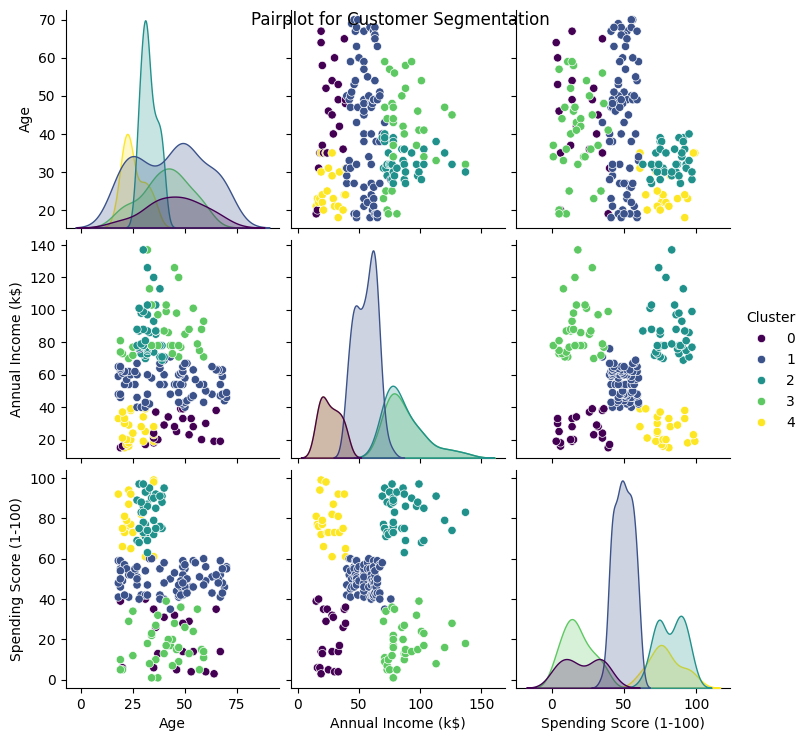

In [44]:
# Assume that you want to cluster based on the 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' columns
kmeans = KMeans(n_clusters=5)  # Replace 5 with the number of clusters you want
kmeans.fit(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Generate cluster labels
train_cluster_labels = kmeans.labels_

# Check the length of the cluster labels
print(len(train_cluster_labels))

# Check the shape of your dataframe
print(data.shape)

# If the lengths don't match, you can try to slice your dataframe to match the length of the cluster labels
if len(train_cluster_labels) < data.shape[0]:
    data = data.head(len(train_cluster_labels))

# Now you can assign the cluster labels to a new column in your dataframe
data['Cluster'] = train_cluster_labels

# Now you can create the pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot for Customer Segmentation')
plt.show()

C:\Users\Krish\AppData\Local\Temp\ipykernel_20052\1156052725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')


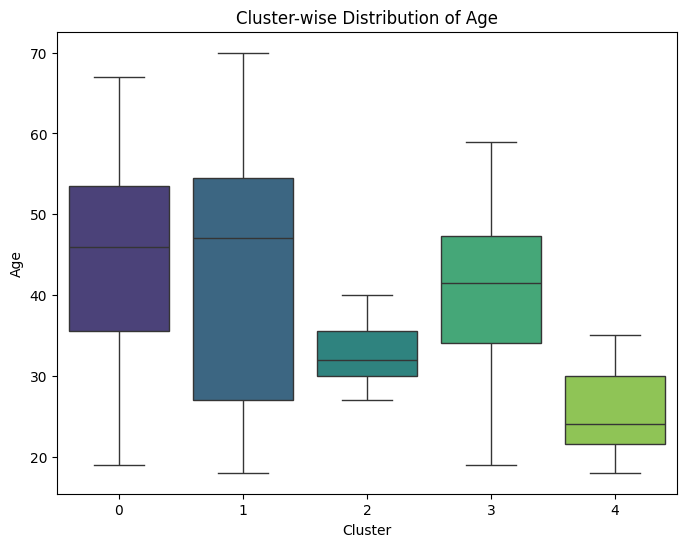

C:\Users\Krish\AppData\Local\Temp\ipykernel_20052\1156052725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')


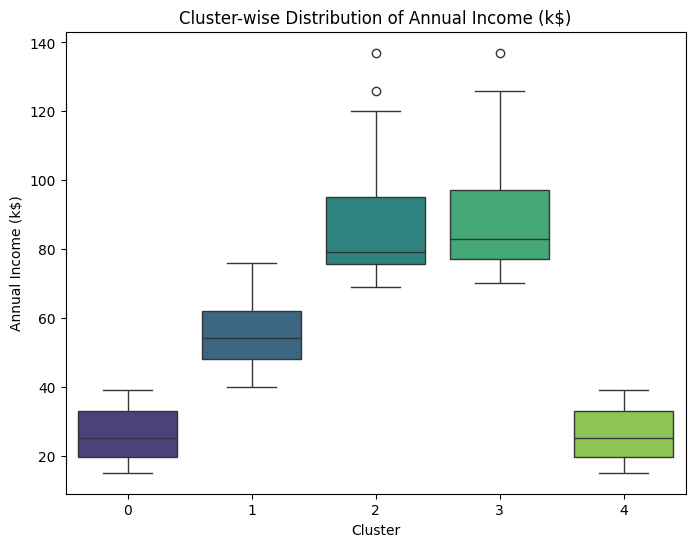

C:\Users\Krish\AppData\Local\Temp\ipykernel_20052\1156052725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')


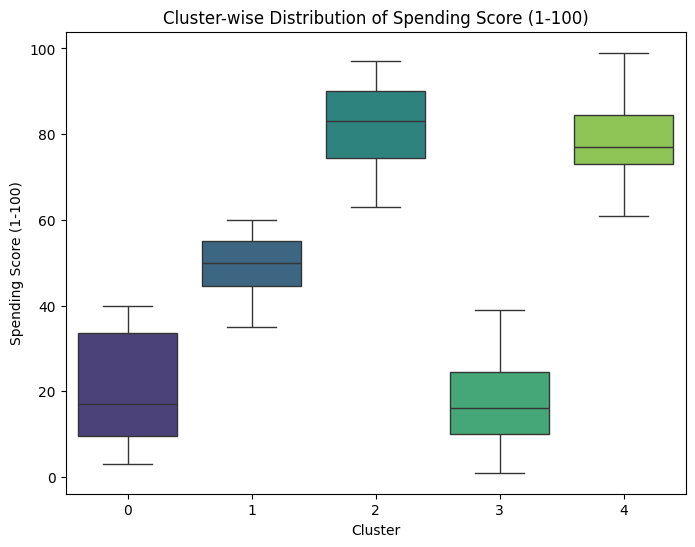

In [46]:
for feature in features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Cluster-wise Distribution of {feature}')
    plt.show()

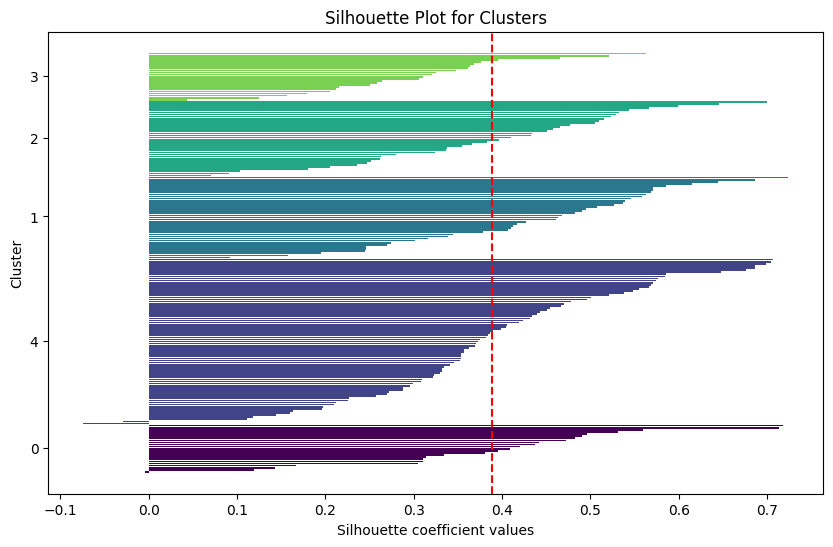

In [50]:
from sklearn.metrics import silhouette_samples  # Import silhouette_samples function
from mpl_toolkits.mplot3d import Axes3D

# Silhouette plot for evaluating cluster quality
silhouette_vals = silhouette_samples(scaled_features, cluster_labels)
plt.figure(figsize=(10, 6))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(sorted(data['Cluster'].unique())):
    cluster_silhouette_vals = silhouette_vals[data['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.viridis(float(i) / len(data['Cluster'].unique()))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, data['Cluster'].unique())
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient values')
plt.title('Silhouette Plot for Clusters')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Compute silhouette scores
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
silhouette_vals = silhouette_samples(scaled_features, cluster_labels)

# Print the average silhouette score
print(f'Average Silhouette Score: {silhouette_avg:.2f}')

# Print silhouette score for each sample (optional)
for i in range(optimal_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    print(f'Silhouette Score for Cluster {i}: {np.mean(cluster_silhouette_vals):.2f}')

Average Silhouette Score: 0.39
Silhouette Score for Cluster 0: 0.41
Silhouette Score for Cluster 1: 0.62
Silhouette Score for Cluster 2: 0.38
Silhouette Score for Cluster 3: 0.37
Silhouette Score for Cluster 4: 0.27
